Sources:
https://data.humdata.org/dataset/uganda-administrative-level-population-statistics
https://www.worldpop.org/geodata/summary?id=16920
https://data.humdata.org/dataset/uganda-administrative-boundaries-admin-1-admin-3


                    Starting age        Duration
ECE                            3              3
Pre-primary                    3              3
Primary                        6              7
Lower secondary               13              4
Upper secondary               17              2

In [1]:
import sys, os, csv, math, statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as diag
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
os.chdir("C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data")  # REMOVE
if os.getcwd()!="C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data":
    print("Please insert the WORKING DIRECTORY")                                                            # We create a loop so that the user establishes the working directory
    print("Remember to separate the backslash (for Windows) or forward slash (in Mac)") 
    while True:                                                                             
        NewPath=input()                                                                                     # The user inserts the working directory
        if os.path.exists(NewPath)==True:                                                                   # If the program exists, the working directory will be updated
            os.chdir(NewPath)                                                               
            print("Your new path is " + os.getcwd())                                        
            break                                                                                           # If the condition is met, the program keeps running
        else:                                                                                               # If the condition is not met, the program requests the user to
            print("Please check if the path is correctly written")                                          # insert a new path and the condition is checked again
        continue
else: 
    print("Your path is " + os.getcwd())

Please insert the WORKING DIRECTORY
Remember to separate the backslash (for Windows) or forward slash (in Mac)
C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\\MP_01000298_RND_SDA\\WorkFiles_Experts\\298-Issue-Papers\\298-Issue-Paper-Sprague\\Replication files\\Data
Your new path is C:\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298_RND_SDA\WorkFiles_Experts\298-Issue-Papers\298-Issue-Paper-Sprague\Replication files\Data


In [3]:
Uganda = pd.read_excel("Tables\\Uganda\\uga_admpop_2020.xlsx",  sheet_name='uga_admpop_adm2_2020proj_1yr')
Uganda.drop(['M_30', 'M_31', 'M_32', 'M_33', 'M_34', 'M_35', 'M_36', 'M_37', 'M_38', 'M_39', 'M_40', 'M_41', 'M_42', 'M_43', 'M_44', 'M_45', 'M_46', 'M_47', 'M_48', 'M_49', 'M_50', 'M_51', 'M_52', 'M_53', 'M_54', 'M_55', 'M_56', 'M_57', 'M_58', 'M_59', 'M_60', 'M_61', 'M_62', 'M_63', 'M_64', 'M_65', 'M_66', 'M_67', 'M_68', 'M_69', 'M_70', 'M_71', 'M_72', 'M_73', 'M_74', 'M_75', 'M_76', 'M_77', 'M_78', 'M_79', 'M_80plus', 'Total', 'M_TOTAL', 'F_TOTAL', 'F_30', 'F_31', 'F_32', 'F_33', 'F_34', 'F_35', 'F_36', 'F_37', 'F_38', 'F_39', 'F_40', 'F_41', 'F_42', 'F_43', 'F_44', 'F_45', 'F_46', 'F_47', 'F_48', 'F_49', 'F_50', 'F_51', 'F_52', 'F_53', 'F_54', 'F_55', 'F_56', 'F_57', 'F_58', 'F_59', 'F_60', 'F_61', 'F_62', 'F_63', 'F_64', 'F_65', 'F_66', 'F_67', 'F_68', 'F_69', 'F_70', 'F_71', 'F_72', 'F_73', 'F_74', 'F_75', 'F_76', 'F_77', 'F_78', 'F_79', 'F_80plus'], axis=1, inplace=True)
Uganda

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,M_00,M_01,M_02,M_03,...,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29
0,Uganda,UG,Central,UG1,BUIKWE,UG1001,8070,7620,8030,7760,...,5350,4850,4920,4810,4530,4430,4250,4080,4140,3790
1,Uganda,UG,Central,UG1,BUKOMANSIMBI,UG1002,2520,2690,2700,2660,...,1200,1130,1110,1170,1010,1040,1020,1000,970,940
2,Uganda,UG,Central,UG1,BUTAMBALA,UG1003,1710,1850,1950,2000,...,1000,790,770,890,720,840,670,750,710,590
3,Uganda,UG,Central,UG1,BUVUMA,UG1004,2840,2650,2710,2700,...,1720,1210,1390,1130,1140,1290,1030,1210,1330,1010
4,Uganda,UG,Central,UG1,GOMBA,UG1005,3220,3250,3130,3090,...,1460,1280,1250,1340,1140,1210,1070,1210,1040,1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Uganda,UG,Western,UG4,RUBIRIZI,UG4131,2450,2430,2660,2780,...,1620,1110,1220,1150,1160,1170,1060,1010,1300,820
131,Uganda,UG,Western,UG4,RUKIGA,UG4132,1600,1620,1730,1790,...,1210,860,1090,830,860,870,720,720,790,660
132,Uganda,UG,Western,UG4,RUKUNGIRI,UG4133,5090,5270,5610,6040,...,3870,2980,3090,2360,2540,2540,2280,2260,2670,1930
133,Uganda,UG,Western,UG4,RWAMPARA,UG4134,2460,2390,2600,2650,...,1690,1280,1300,1190,1190,1220,1010,1030,1150,810


In [4]:
Uganda.to_csv('Tables\\Uganda\\Population_Uganda_clean.csv', index=True, header=["ADM0_EN", "ADM0_PCODE", "ADM1_EN", "ADM1_PCODE", "ADM2_EN", "ADM2_PCODE", "Male_0", "Male_1", "Male_2", "Male_3", "Male_4", "Male_5", "Male_6", "Male_7", "Male_8", "Male_9", "Male_10", "Male_11", "Male_12", "Male_13", "Male_14", "Male_15", "Male_16", "Male_17", "Male_18", "Male_19", "Male_20", "Male_21", "Male_22", "Male_23", "Male_24", "Male_25", "Male_26", "Male_27", "Male_28", "Male_29", "Female_0", "Female_1", "Female_2", "Female_3", "Female_4", "Female_5", "Female_6", "Female_7", "Female_8", "Female_9", "Female_10", "Female_11", "Female_12", "Female_13", "Female_14", "Female_15", "Female_16", "Female_17", "Female_18", "Female_19", "Female_20", "Female_21", "Female_22", "Female_23", "Female_24", "Female_25", "Female_26", "Female_27", "Female_28", "Female_29"])

## Comparing the estimated population with the actual population


In [5]:
CensusData = pd.read_csv("Tables\\Uganda\\Population_Uganda_clean.csv")

# ECE (Starting age: 3 years old - Duration: 3 years)
#CensusData['CD_ECE_Female'] = CensusData['Female_3'] + CensusData['Female_4'] + CensusData['Female_5'] 
#CensusData['CD_ECE_Male'] = CensusData['Male_3'] + CensusData['Male_4'] + CensusData['Male_5']
#CensusData['CD_ECE'] = CensusData['CD_ECE_Female'] + CensusData['CD_ECE_Male']

# Pre-primary (Starting age: 3 years old - Duration: 3 years)
CensusData['CD_PrePrimary_Female'] = CensusData['Female_3'] + CensusData['Female_4'] + CensusData['Female_5'] 
CensusData['CD_PrePrimary_Male'] = CensusData['Male_3'] + CensusData['Male_4'] + CensusData['Male_5']
CensusData['CD_PrePrimary'] = CensusData['CD_PrePrimary_Female'] + CensusData['CD_PrePrimary_Male']

# Primary (Starting age: 6 years old - Duration: 7 years)
CensusData['CD_Primary_Female'] = CensusData['Female_6'] + CensusData['Female_7'] + CensusData['Female_8'] + CensusData['Female_9'] + CensusData['Female_10'] + CensusData['Female_11'] + CensusData['Female_12']
CensusData['CD_Primary_Male'] = CensusData['Male_6'] + CensusData['Male_7'] + CensusData['Male_8'] + CensusData['Male_9'] + CensusData['Male_10'] + CensusData['Male_11'] + CensusData['Male_12']
CensusData['CD_Primary'] = CensusData['CD_Primary_Female'] + CensusData['CD_Primary_Male']

# Lower secondary (Starting age: 13 years old - Duration: 4 years)
CensusData['CD_LowSec_Female'] = CensusData['Female_13'] + CensusData['Female_14'] + CensusData['Female_15'] + CensusData['Female_16'] 
CensusData['CD_LowSec_Male'] = CensusData['Male_13'] + CensusData['Male_14'] + CensusData['Male_15'] + CensusData['Male_16']
CensusData['CD_LowSec'] = CensusData['CD_LowSec_Female'] + CensusData['CD_LowSec_Male']

# Upper secondary (Starting age: 17 years old - Duration: 2 years)
CensusData['CD_UppSec_Female'] = CensusData['Female_17'] + CensusData['Female_18'] 
CensusData['CD_UppSec_Male'] = CensusData['Male_17'] + CensusData['Male_18'] 
CensusData['CD_UppSec'] = CensusData['CD_UppSec_Female'] + CensusData['CD_UppSec_Male']

In [6]:
PopulationEstimates = pd.read_csv("Raster data\\Uganda\\Population_estimates_uga2020SchoolAge.csv", usecols=['ADM2_PCODE', 'Area', 'Pre_primary_F', 'Pre_primary_M', 'Pre_primary_T', 'Primary_F', 'Primary_M', 'Primary_T', 'LowSec_F', 'LowSec_M', 'LowSec_T', 'UppSec_F', 'UppSec_M', 'UppSec_T'])
PopulationEstimates = PopulationEstimates.rename(columns={'Pre_primary_F': 'PE_PrePrimary_Female', 'Pre_primary_M': 'PE_PrePrimary_Male', 'Pre_primary_T': 'PE_PrePrimary', 'Primary_F': 'PE_Primary_Female', 'Primary_M': 'PE_Primary_Male', 'Primary_T': 'PE_Primary', 'LowSec_F': 'PE_LowSec_Female', 'LowSec_M': 'PE_LowSec_Male', 'LowSec_T': 'PE_LowSec', 'UppSec_F': 'PE_UppSec_Female', 'UppSec_M': 'PE_UppSec_Male', 'UppSec_T': 'PE_UppSec'} )


In [7]:
MergedData = pd.merge(CensusData, PopulationEstimates, how='inner', on='ADM2_PCODE')
MergedData = MergedData[["ADM0_EN", "ADM0_PCODE", "ADM1_EN", "ADM1_PCODE", "ADM2_EN", "ADM2_PCODE", 'PE_PrePrimary_Female', 'PE_PrePrimary_Male', 'PE_PrePrimary', 'PE_Primary_Female', 'PE_Primary_Male', 'PE_Primary', 'PE_LowSec_Female', 'PE_LowSec_Male', 'PE_LowSec', 'PE_UppSec_Female', 'PE_UppSec_Male', 'PE_UppSec', 'CD_PrePrimary_Female', 'CD_PrePrimary_Male', 'CD_PrePrimary', 'CD_Primary_Female', 'CD_Primary_Male', 'CD_Primary', 'CD_LowSec_Female', 'CD_LowSec_Male', 'CD_LowSec', 'CD_UppSec_Female', 'CD_UppSec_Male', 'CD_UppSec', 'Area']]
MergedData['ADM2_EN'] = MergedData['ADM2_EN'].str.title() 
MergedData

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,PE_PrePrimary_Female,PE_PrePrimary_Male,PE_PrePrimary,PE_Primary_Female,...,CD_Primary_Female,CD_Primary_Male,CD_Primary,CD_LowSec_Female,CD_LowSec_Male,CD_LowSec,CD_UppSec_Female,CD_UppSec_Male,CD_UppSec,Area
0,Uganda,UG,Central,UG1,Buikwe,UG1001,25219.097694,25372.507886,50591.605579,52887.565257,...,45190,47850,93040,24840,25340,50180,11670,12350,24020,145319.675524
1,Uganda,UG,Central,UG1,Bukomansimbi,UG1002,7665.626671,8255.968374,15921.595046,18600.189919,...,15900,18410,34310,8360,9430,17790,3110,3720,6830,59983.728690
2,Uganda,UG,Central,UG1,Butambala,UG1003,5115.946547,5728.336751,10844.283298,13778.277935,...,10830,12740,23570,6030,6580,12610,2490,2710,5200,40560.135905
3,Uganda,UG,Central,UG1,Buvuma,UG1004,5585.832834,5609.824482,11195.657316,7826.394131,...,10630,10650,21280,4110,4630,8740,2110,2260,4370,961955.164366
4,Uganda,UG,Central,UG1,Gomba,UG1005,9090.743595,9398.832144,18489.575739,20390.492802,...,16880,19230,36110,8440,10470,18910,3280,4340,7620,167056.781526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Uganda,UG,Western,UG4,Rubirizi,UG4131,7306.469365,7839.117655,15145.587020,13953.794637,...,15690,16460,32150,7760,7810,15570,3180,3110,6290,146920.919374
131,Uganda,UG,Western,UG4,Rukiga,UG4132,4708.805056,4675.315912,9384.120968,11672.667823,...,10460,10600,21060,5450,5600,11050,2440,2490,4930,42711.754707
132,Uganda,UG,Western,UG4,Rukungiri,UG4133,16580.540239,16024.821012,32605.361251,38338.710564,...,33830,35090,68920,18140,17960,36100,8540,8220,16760,152925.769366
133,Uganda,UG,Western,UG4,Rwampara,UG4134,7160.734568,7353.278546,14514.013114,15603.181352,...,15260,15710,30970,7400,7620,15020,3320,3330,6650,57468.160183


In [8]:
Levels = ['PrePrimary', 'Primary', 'LowSec', 'UppSec']

for x in range(len(Levels)):
    MergedData['Dif_'+Levels[x]] = MergedData['PE_'+Levels[x]] - MergedData['CD_'+Levels[x]]
    MergedData['Dif_'+Levels[x]+'_std'] = (MergedData['Dif_'+Levels[x]] - MergedData['Dif_'+Levels[x]].mean())/MergedData['Dif_'+Levels[x]].std()
    MergedData['PE_'+Levels[x]+'_std'] = (MergedData['PE_'+Levels[x]] - MergedData['PE_'+Levels[x]].mean())/MergedData['PE_'+Levels[x]].std()
    MergedData['CD_'+Levels[x]+'_std'] = (MergedData['CD_'+Levels[x]] - MergedData['CD_'+Levels[x]].mean())/MergedData['CD_'+Levels[x]].std()
MergedData

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,PE_PrePrimary_Female,PE_PrePrimary_Male,PE_PrePrimary,PE_Primary_Female,...,PE_Primary_std,CD_Primary_std,Dif_LowSec,Dif_LowSec_std,PE_LowSec_std,CD_LowSec_std,Dif_UppSec,Dif_UppSec_std,PE_UppSec_std,CD_UppSec_std
0,Uganda,UG,Central,UG1,Buikwe,UG1001,25219.097694,25372.507886,50591.605579,52887.565257,...,0.742756,0.589588,717.624803,0.287985,0.642916,0.680755,-1445.205396,-0.385929,0.566932,0.659693
1,Uganda,UG,Central,UG1,Bukomansimbi,UG1002,7665.626671,8255.968374,15921.595046,18600.189919,...,-0.438516,-0.566032,-183.782180,0.159457,-0.410523,-0.524271,-669.861120,-0.011280,-0.494080,-0.525328
2,Uganda,UG,Central,UG1,Butambala,UG1003,5115.946547,5728.336751,10844.283298,13778.277935,...,-0.615706,-0.777361,982.683698,0.325779,-0.537524,-0.716986,-697.831363,-0.024796,-0.601248,-0.637695
3,Uganda,UG,Central,UG1,Buvuma,UG1004,5585.832834,5609.824482,11195.657316,7826.394131,...,-0.846080,-0.822421,-667.023620,0.090553,-0.712184,-0.860964,811.832711,0.704678,-0.557316,-0.694912
4,Uganda,UG,Central,UG1,Gomba,UG1005,9090.743595,9398.832144,18489.575739,20390.492802,...,-0.390727,-0.530614,-265.984973,0.147736,-0.377684,-0.482603,-672.316158,-0.012467,-0.443175,-0.470868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Uganda,UG,Western,UG4,Rubirizi,UG4131,7306.469365,7839.117655,15145.587020,13953.794637,...,-0.610876,-0.608534,-2328.503409,-0.146351,-0.548636,-0.606863,-313.583314,0.160874,-0.505956,-0.562554
131,Uganda,UG,Western,UG4,Rukiga,UG4132,4708.805056,4675.315912,9384.120968,11672.667823,...,-0.710640,-0.826750,1672.215911,0.424097,-0.565068,-0.775024,637.310675,0.620349,-0.532400,-0.656308
132,Uganda,UG,Western,UG4,Rukungiri,UG4133,16580.540239,16024.821012,32605.361251,38338.710564,...,0.212849,0.114983,2821.604029,0.587983,0.263959,0.156928,347.929574,0.480519,0.213564,0.159213
133,Uganda,UG,Western,UG4,Rwampara,UG4134,7160.734568,7353.278546,14514.013114,15603.181352,...,-0.575856,-0.631753,127.008353,0.203771,-0.488340,-0.627325,143.548499,0.381762,-0.453138,-0.537737


Pre-primary


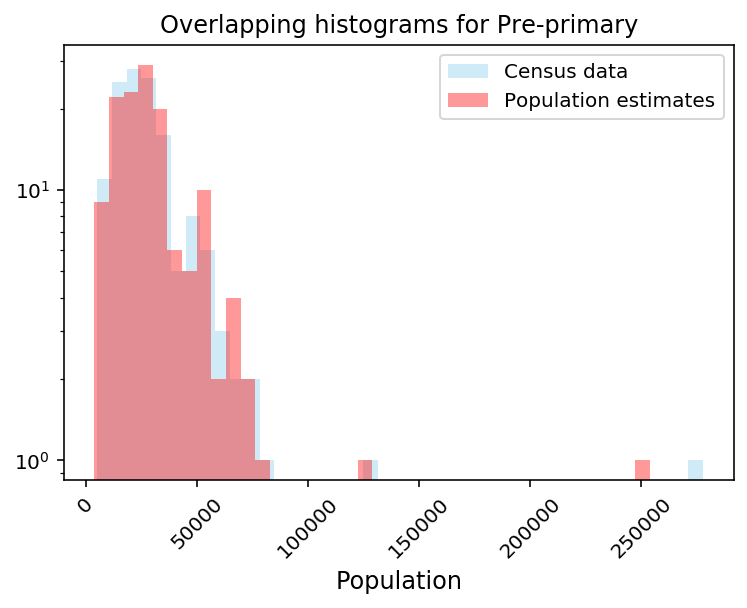

Primary


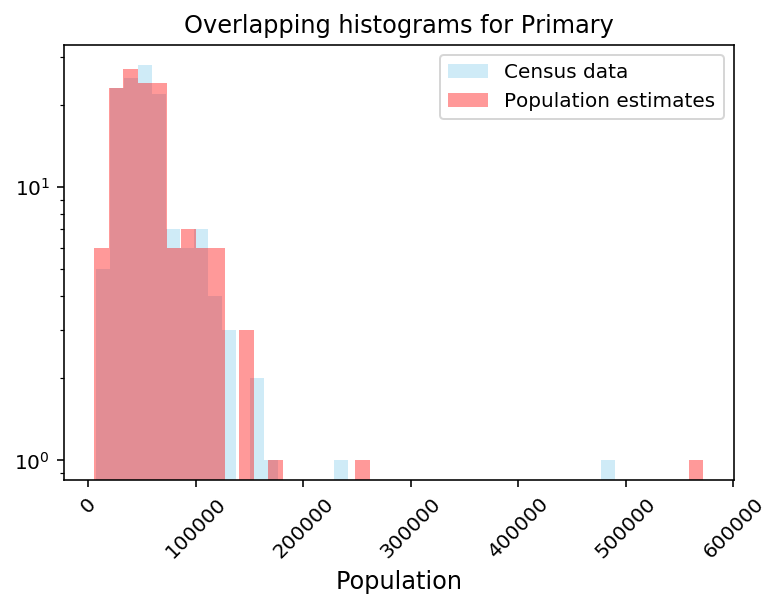

Lower secondary


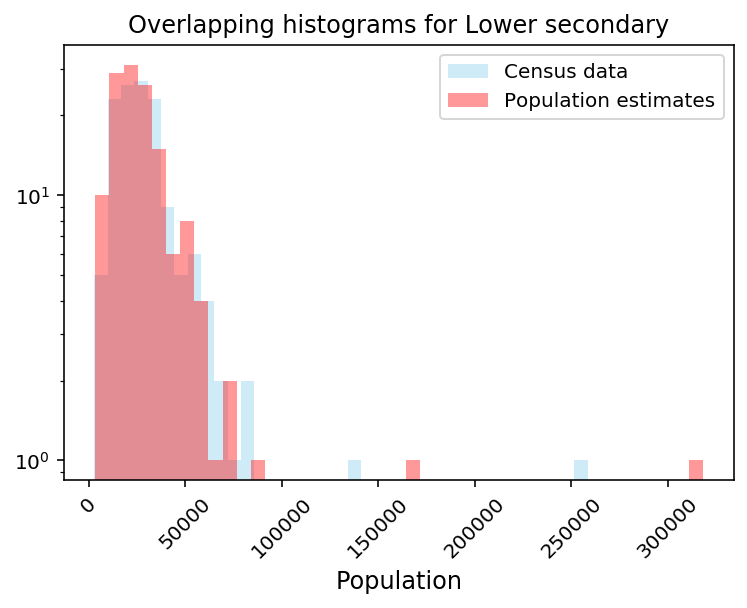

Upper secondary


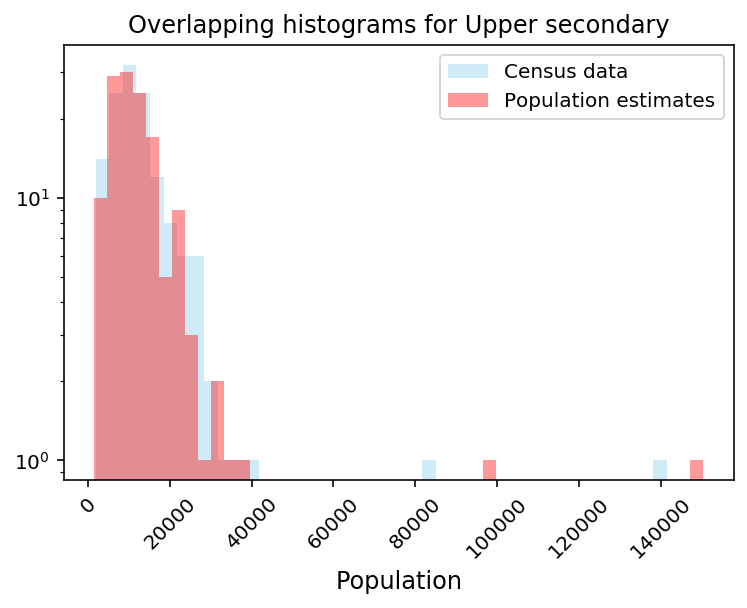

In [9]:
bars = ['Pre-primary', 'Primary', 'Lower secondary', 'Upper secondary']
for x in range(len(Levels)):
    print(bars[x])
    sns.distplot( MergedData["CD_"+Levels[x]] , color="skyblue", label="Census data", hist=True, kde=False, rug=False)
    sns.distplot( MergedData["PE_"+Levels[x]] , color="red", label="Population estimates", hist=True, kde=False, rug=False)
    plt.xlabel('Population', color = 'black', fontsize='12')
    plt.title("Overlapping histograms for " + bars[x])
    plt.legend()
    plt.xticks(color='black', rotation=45)
    plt.yscale('log')
    plt.show()


Pre-primary


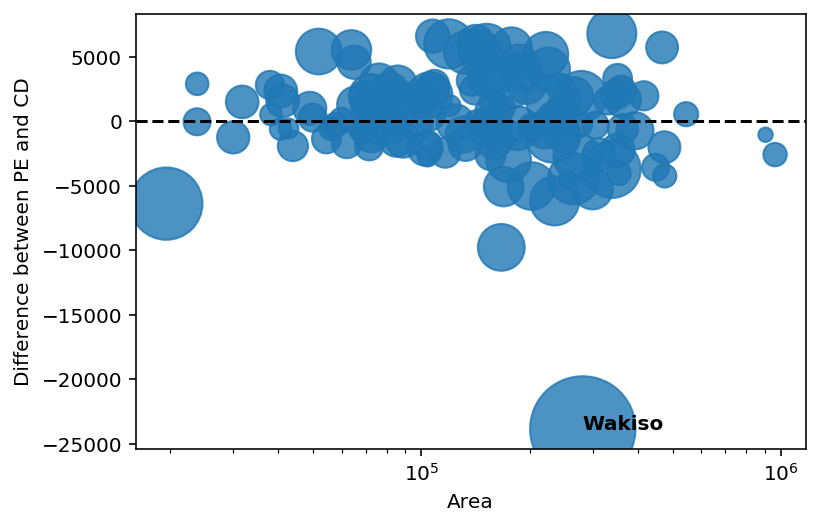

Primary


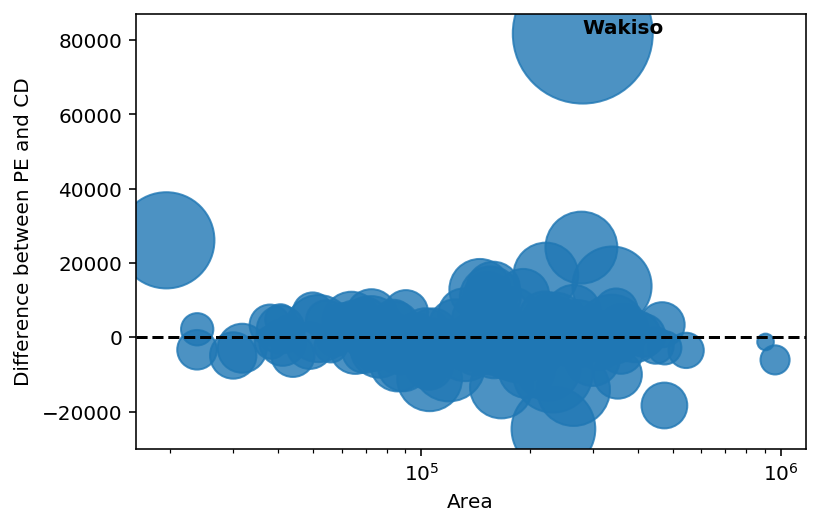

Lower secondary


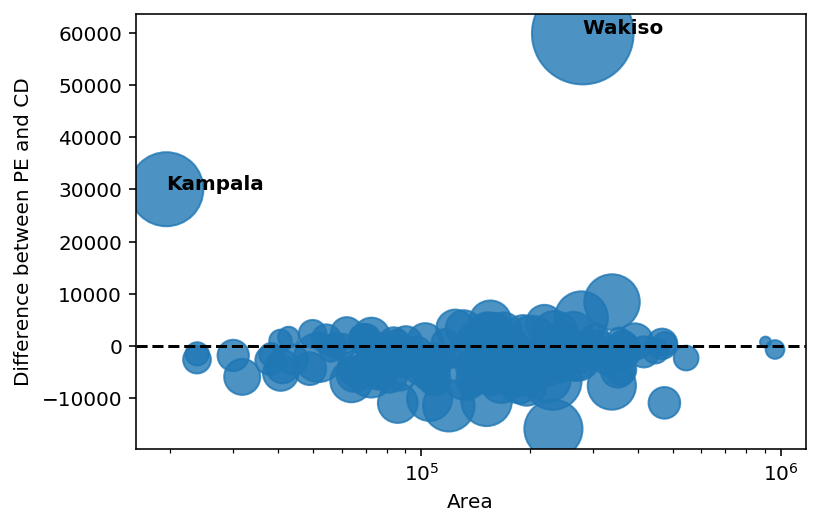

Upper secondary


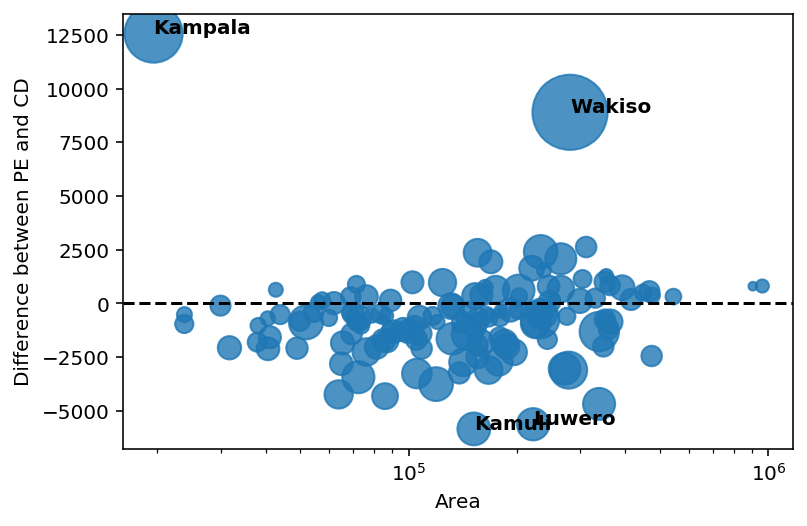

In [10]:
for x in range(len(Levels)):
    MergedData['Label_'+Levels[x]] = np.where(MergedData['Dif_'+Levels[x]]>=MergedData['Dif_'+Levels[x]].mean()+3*MergedData['Dif_'+Levels[x]].std(), MergedData['ADM2_EN'],
                                              np.where(MergedData['Dif_'+Levels[x]]<=-MergedData['Dif_'+Levels[x]].mean()-3*MergedData['Dif_'+Levels[x]].std(), MergedData['ADM2_EN'], ''))
    print(bars[x])
    p1 = sns.regplot(x=MergedData['Area'], y=MergedData['Dif_'+Levels[x]], scatter_kws={'s':MergedData['CD_'+Levels[x]]/100}, fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['Area'][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

In [11]:
Results = {}
for x in range(len(Levels)):
    formula = "PE_"+Levels[x]+"_std ~ CD_"+Levels[x]+"_std"
    result = sm.ols(formula=formula, data=MergedData).fit()
    heteroscedasticity_test = diag.het_breuschpagan(result.resid, result.model.exog)
    if heteroscedasticity_test[-1] <= 0.05:
        # The hypothesis that the error variance does not depend on x is rejected. There exists heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit(cov_type='HC0')
        print("Robust regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'Yes'}
    else:
        # The hypothesis that the error variance does not depend on x is kept. There is no heteroscedasticity 
        result = sm.ols(formula=formula, data=MergedData).fit()
        print("Regression results for "+bars[x]+"\n")
        print(result.summary())
        print("\n")
        T_test = result.t_test('CD_'+Levels[x]+'_std = 1')
        print("\nP-Value:{0} T-Statistic:{1}".format(T_test.pvalue,T_test.tvalue[0][0]))
        if T_test.pvalue>0.05:
            print("No statistical difference between census data and population estimates for "+bars[x]+"\n")
        else:
            print("Evidence of statistical difference between census data and population estimates for "+Levels[x]+"\n")
        Results[Levels[x]] = {'Coefficient': T_test.effect[0], 'Std': T_test.sd[0][0], 't_test': T_test.tvalue[0][0], 'p_value': T_test.pvalue, 'R_square':result.rsquared, 'Robust':'No'}


Robust regression results for Pre-primary

                            OLS Regression Results                            
Dep. Variable:      PE_PrePrimary_std   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1681.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           2.48e-77
Time:                        15:46:40   Log-Likelihood:                 94.649
No. Observations:                 135   AIC:                            -185.3
Df Residuals:                     133   BIC:                            -179.5
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [12]:
Results = pd.DataFrame.from_dict(Results)
Results = Results.transpose()
Results['ConfidenceInterval'] = 1.98*Results['Std']
Results['Color'] = np.where(Results['Robust']=='Yes','lightblue','darkolivegreen')
Results = Results.transpose()
Results

,PrePrimary,Primary,LowSec,UppSec
Coefficient,0.992717,0.990692,0.984181,0.992531
Std,0.0242138,0.039002,0.0547247,0.0239316
t_test,-0.300796,-0.238657,-0.289064,-0.312092
p_value,0.7635697258495768,0.8113712958399958,0.7725324459190477,0.7549707030863513
R_square,0.985486,0.98147,0.968612,0.985118
Robust,Yes,Yes,Yes,Yes
ConfidenceInterval,0.0479434,0.0772239,0.108355,0.0473846
Color,lightblue,lightblue,lightblue,lightblue


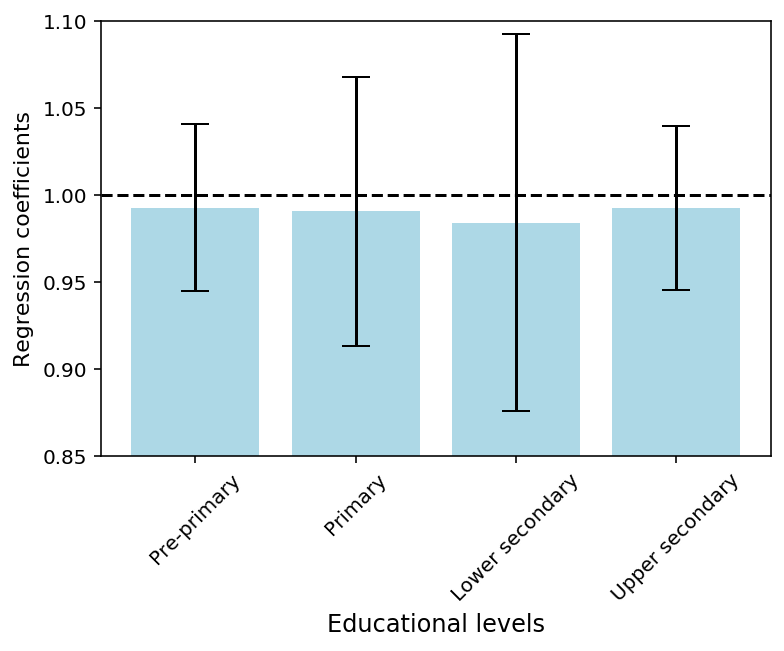

In [13]:
height = list(Results.loc['Coefficient'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
yer1 = list(Results.loc['ConfidenceInterval'])
plt.bar(y_pos, height, yerr=yer1, capsize=7, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('Regression coefficients', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.85,1.1)
plt.show()

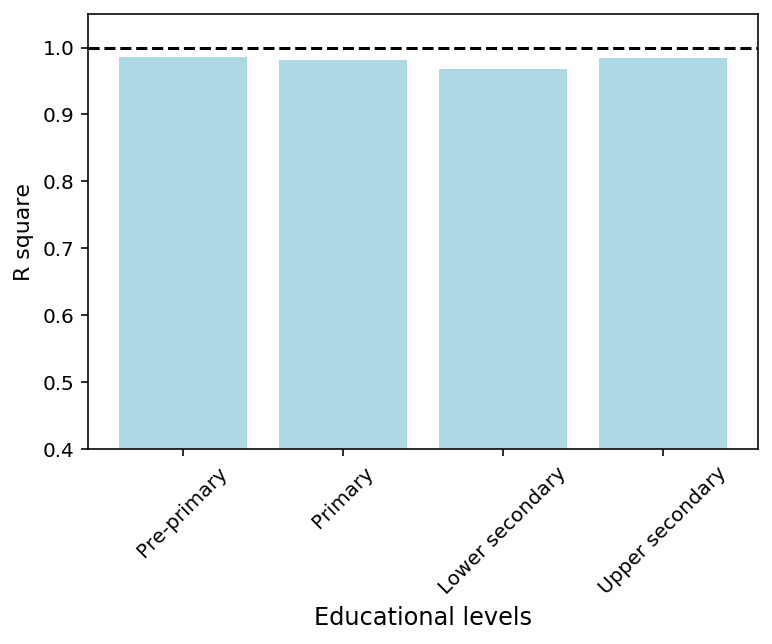

In [14]:
height = list(Results.loc['R_square'])
colors = list(Results.loc['Color'])
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=colors)
plt.xlabel('Educational levels', color = 'black', fontsize='12')
plt.ylabel('R square', color='black', fontsize='11')
plt.xticks(y_pos, bars, color='black', rotation=45)
plt.yticks(color='black')
plt.axhline(y=1, color='black', linestyle='dashed')
plt.ylim(0.4,1.05)
plt.show()

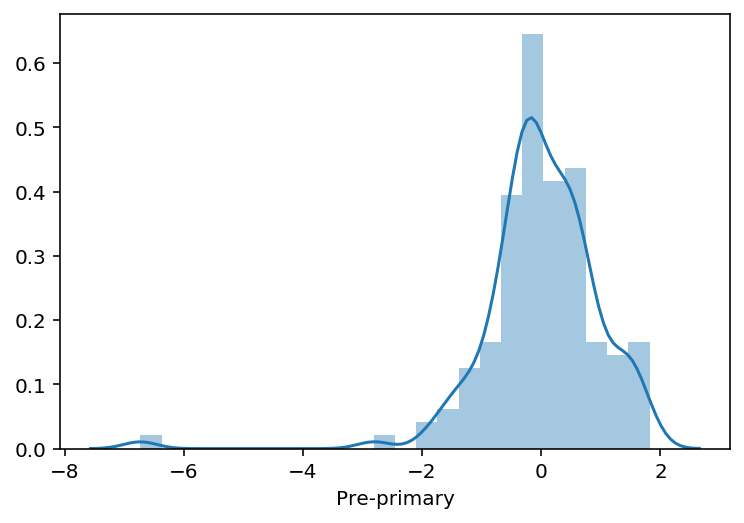

The difference between the Population estimates and the
Census data is not normally distributed for Pre-primary


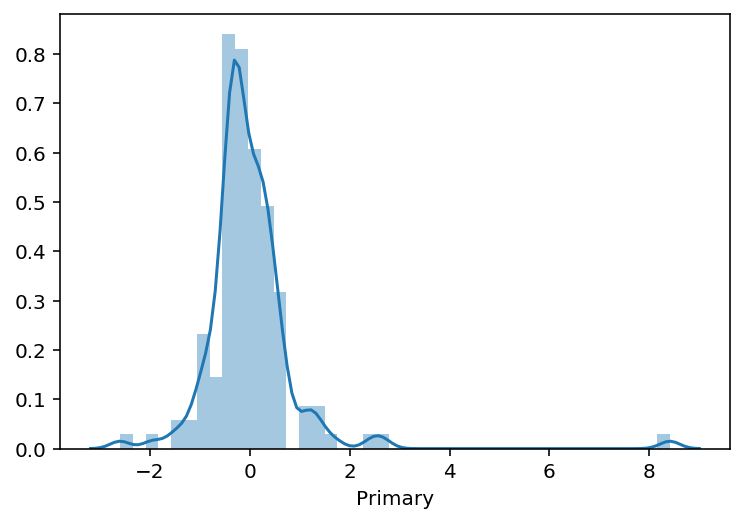

The difference between the Population estimates and the
Census data is not normally distributed for Primary


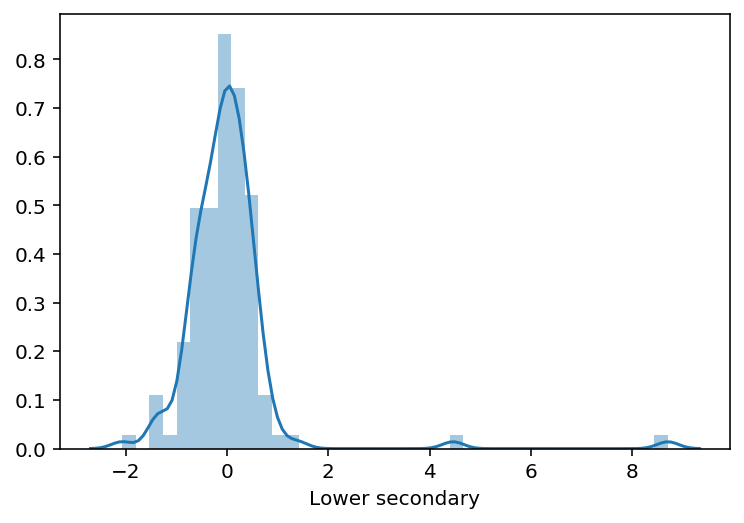

The difference between the Population estimates and the
Census data is not normally distributed for Lower secondary


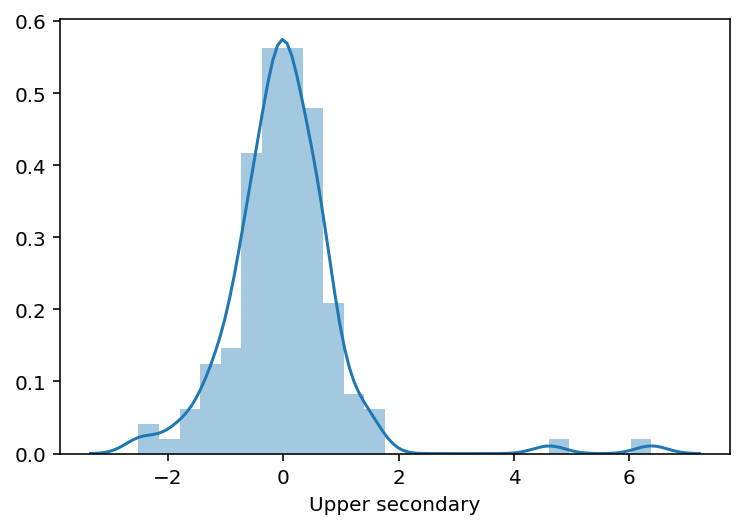

The difference between the Population estimates and the
Census data is not normally distributed for Upper secondary


In [15]:
for x in range(len(Levels)):
    sns.distplot( MergedData["Dif_"+Levels[x]+"_std"])
    plt.xlabel(bars[x])
    plt.show()
    jbt = jarque_bera(MergedData["Dif_"+Levels[x]+"_std"])
    if jbt[1]>0.05:
        print("The difference between the Population estimates and the")
        print("Census data is normally distributed for "+bars[x])
    else:
        print("The difference between the Population estimates and the")
        print("Census data is not normally distributed for "+bars[x])

Pre-primary


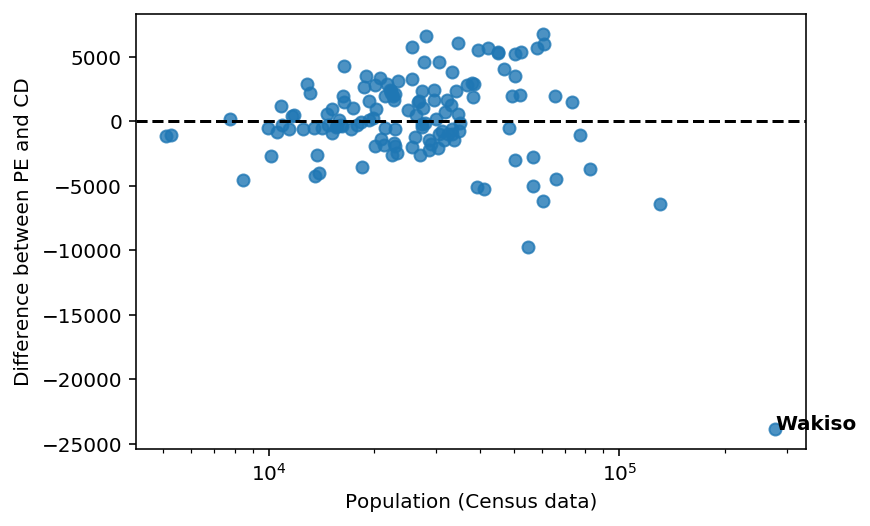

Primary


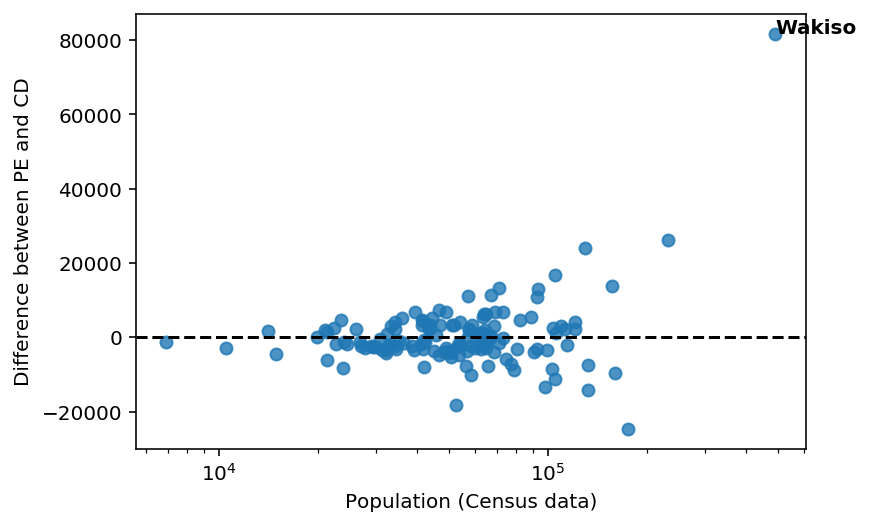

Lower secondary


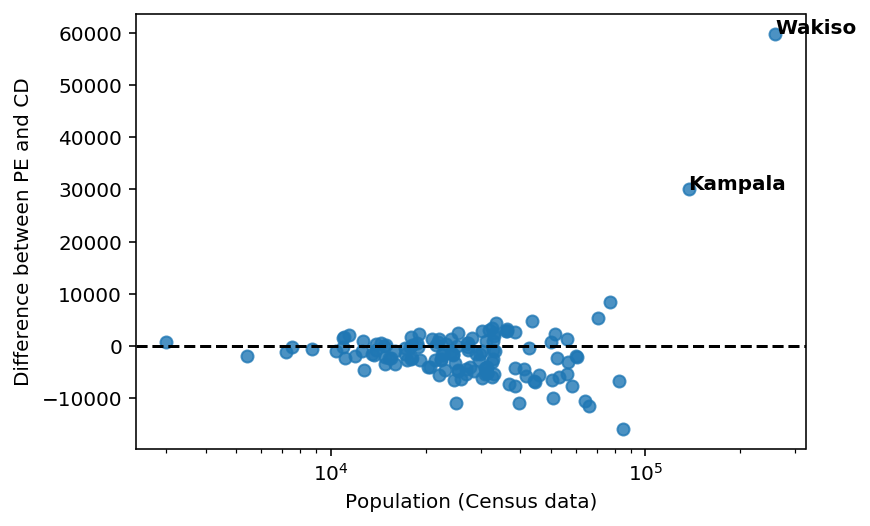

Upper secondary


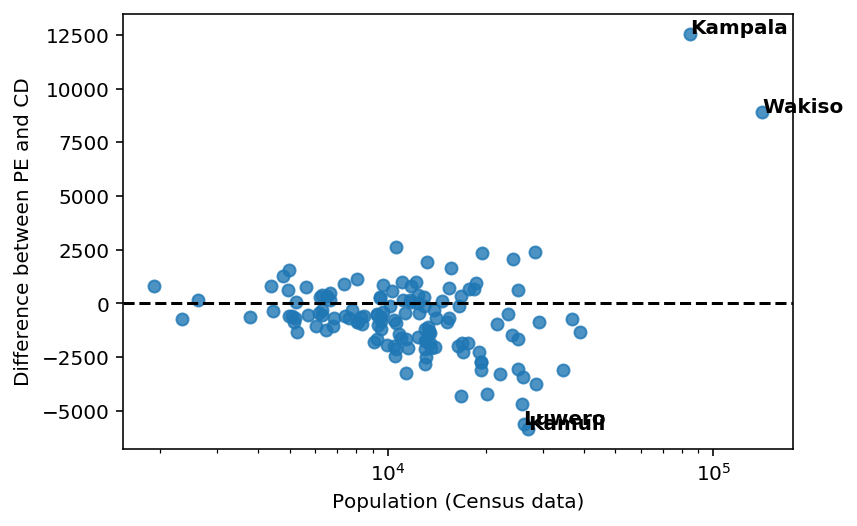

In [16]:
for x in range(len(Levels)):
    print(bars[x])
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Dif_'+Levels[x]], fit_reg=False)
    
    for line in range(0,MergedData.shape[0]):
        p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()

Pre-primary


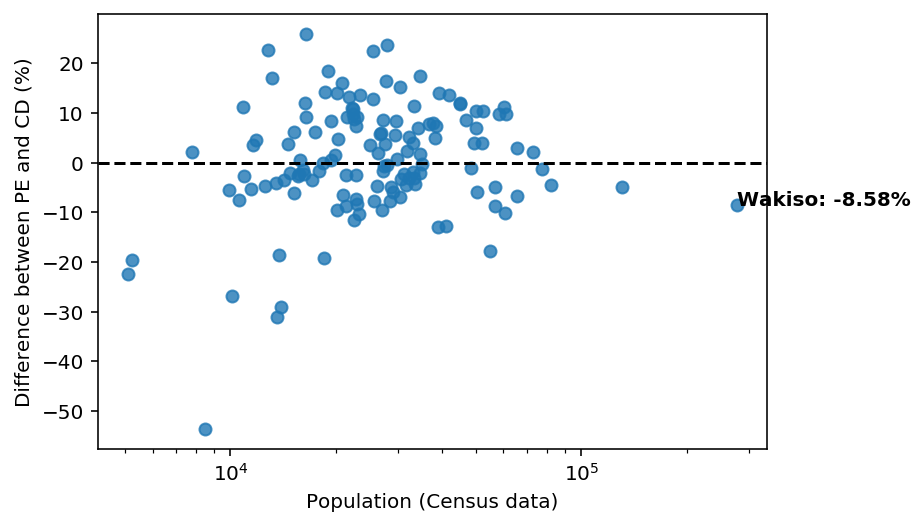

Primary


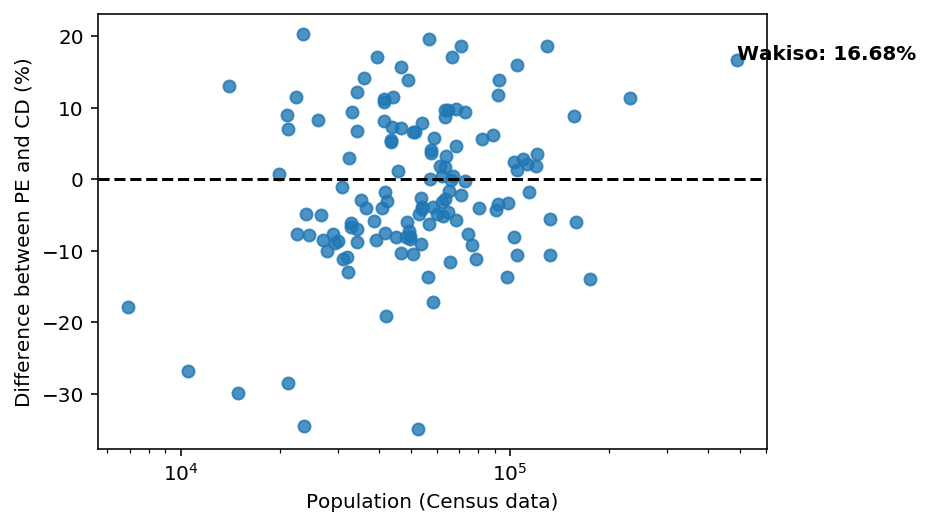

Lower secondary


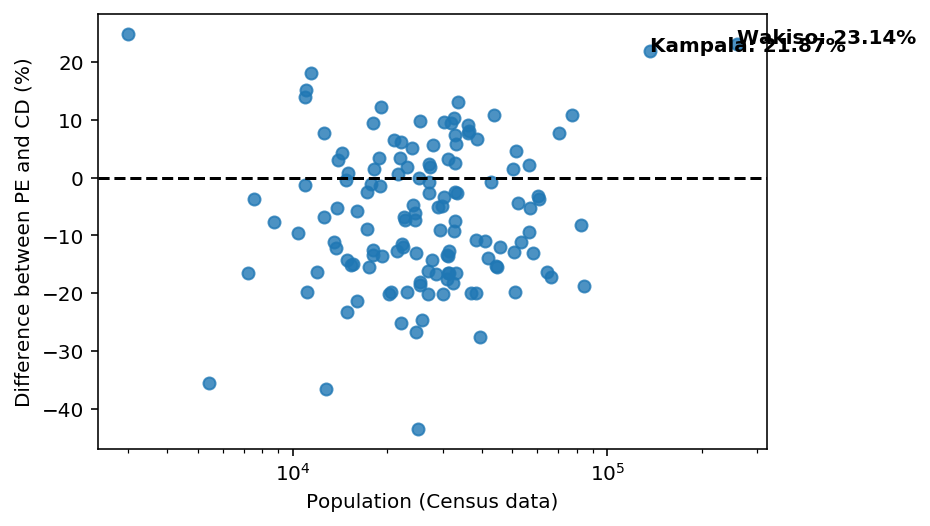

Upper secondary


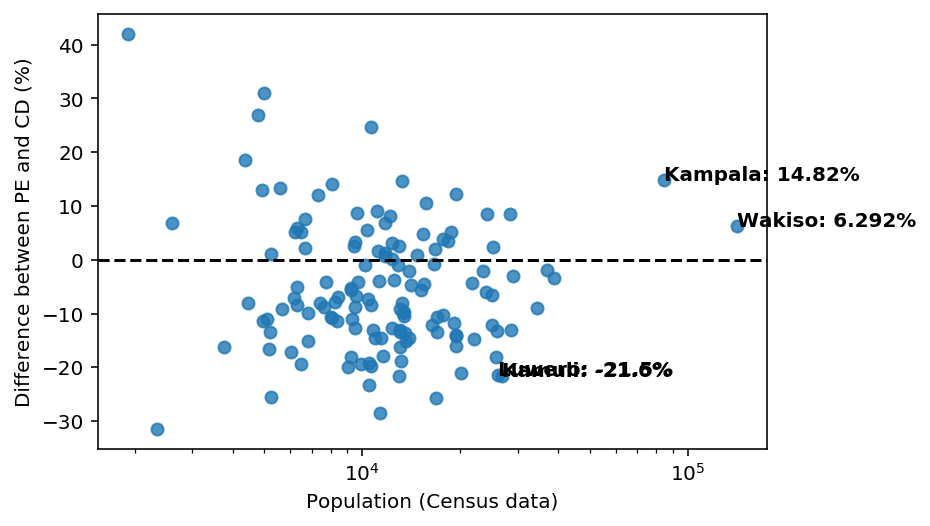

In [17]:
for x in range(len(Levels)):
    print(bars[x])
    MergedData['Perc_Dif_'+Levels[x]] = MergedData['Dif_'+Levels[x]]/MergedData['CD_'+Levels[x]]*100
    p1 = sns.regplot(x=MergedData['CD_'+Levels[x]], y=MergedData['Perc_Dif_'+Levels[x]], fit_reg=False)
    for line in range(0,MergedData.shape[0]):
        if MergedData['Label_'+Levels[x]][line]!='':
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line]+': '+str(MergedData['Perc_Dif_'+Levels[x]][line])[:5]+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')
        else:
            p1.text(MergedData['CD_'+Levels[x]][line]+0.2, MergedData['Perc_Dif_'+Levels[x]][line], MergedData['Label_'+Levels[x]][line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.ylabel('Difference between PE and CD (%)')
    plt.xlabel('Population (Census data)')
    plt.xscale('log')
    plt.axhline(y=0, color='black', linestyle='dashed')
    plt.show()